# 第 3 章　使用 Pyhton 进行数据分析｜用 Python 动手学统计学

## 第 4 节　用 Python 模拟抽样

### 1. 环境准备

In [1]:
# 用于数值计算的库
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 设置浮点数打印精度
%precision 3
# 在 Jupyter Notebook 里显示图形
%matplotlib inline

### 3. 在只有 5 条鱼的湖中抽样

In [2]:
fish_5 = np.array([2,3,4,5,6])
fish_5

array([2, 3, 4, 5, 6])

In [3]:
# 从总体中随机抽样
np.random.choice(fish_5, size = 1, replace = False)

array([2])

In [4]:
# 从总体中随机抽样
np.random.choice(fish_5, size = 3, replace = False)

array([2, 3, 6])

In [5]:
np.random.choice(fish_5, size = 3, replace = False)

array([6, 3, 2])

In [6]:
# 设定随机数种子以得到相同结果
np.random.seed(1)
np.random.choice(fish_5, size = 3, replace = False)

array([4, 3, 6])

In [7]:
np.random.seed(1)
np.random.choice(fish_5, size = 3, replace = False)

array([4, 3, 6])

In [8]:
# 计算样本均值
np.random.seed(1)
sp.mean(
    np.random.choice(fish_5, size = 3, replace = False)
)

4.333

### 6. 从鱼较多的湖中抽样

In [9]:
# 鱼较多的总体
fish_100000 = pd.read_csv(
    "3-4-1-fish_length_100000.csv")["length"]
fish_100000.head()

0    5.297442
1    3.505566
2    3.572546
3    3.135979
4    4.689275
Name: length, dtype: float64

In [10]:
len(fish_100000)

100000

In [11]:
# 抽样模拟实验
sampling_result = np.random.choice(
    fish_100000, size = 10, replace = False)
sampling_result

array([ 4.091,  5.465,  3.426,  4.287,  4.244,  4.282,  4.29 ,  5.087,
        2.769,  5.296])

In [12]:
# 样本均值
sp.mean(sampling_result)

4.324

### 7. 总体分布

In [13]:
sp.mean(fish_100000)

4.000

In [14]:
sp.std(fish_100000, ddof = 0)

0.800

In [15]:
sp.var(fish_100000, ddof = 0)

0.640

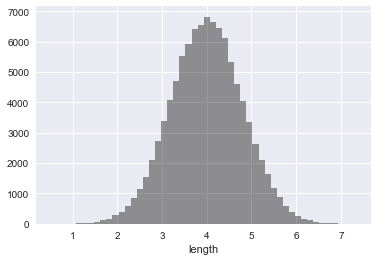

In [16]:
sns.distplot(fish_100000, kde = False, color = 'black')

### 8. 对比总体分布和正态分布的概率密度函数

In [17]:
x = np.arange(start = 1, stop = 7.1, step = 0.1)
x

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ])

In [18]:
stats.norm.pdf(x = x, loc = 4, scale = 0.8)

array([  4.407e-04,   6.988e-04,   1.091e-03,   1.676e-03,   2.536e-03,
         3.778e-03,   5.540e-03,   7.998e-03,   1.137e-02,   1.591e-02,
         2.191e-02,   2.971e-02,   3.967e-02,   5.215e-02,   6.749e-02,
         8.598e-02,   1.078e-01,   1.332e-01,   1.619e-01,   1.938e-01,
         2.283e-01,   2.648e-01,   3.025e-01,   3.401e-01,   3.764e-01,
         4.102e-01,   4.401e-01,   4.648e-01,   4.833e-01,   4.948e-01,
         4.987e-01,   4.948e-01,   4.833e-01,   4.648e-01,   4.401e-01,
         4.102e-01,   3.764e-01,   3.401e-01,   3.025e-01,   2.648e-01,
         2.283e-01,   1.938e-01,   1.619e-01,   1.332e-01,   1.078e-01,
         8.598e-02,   6.749e-02,   5.215e-02,   3.967e-02,   2.971e-02,
         2.191e-02,   1.591e-02,   1.137e-02,   7.998e-03,   5.540e-03,
         3.778e-03,   2.536e-03,   1.676e-03,   1.091e-03,   6.988e-04,
         4.407e-04])

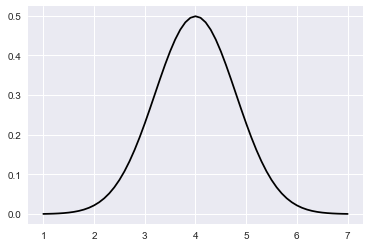

In [22]:
plt.plot(x, 
         stats.norm.pdf(x = x, loc = 4, scale = 0.8), 
         color = 'black')

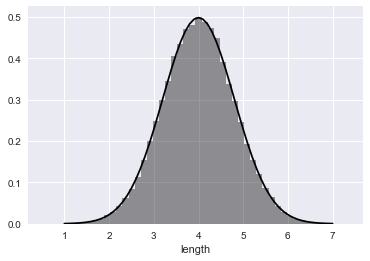

In [23]:
# 把正态分布的概率密度和总体的直方图重合
sns.distplot(fish_100000, kde = False, 
             norm_hist = True, color = 'black')
plt.plot(x, 
         stats.norm.pdf(x = x, loc = 4, scale = 0.8), 
         color = 'black')

### 9. 抽样过程的抽象描述

In [24]:
sampling_norm = stats.norm.rvs(
    loc = 4, scale = 0.8, size = 10)
sampling_norm

array([ 4.037,  3.498,  4.322,  5.295,  5.499,  2.905,  4.437,  4.665,
        3.786,  4.569])

In [25]:
# 样本均值
sp.mean(sampling_norm)

4.301